In [3]:
import importlib
import common_utils
importlib.reload(common_utils)
from common_utils import get_unique_image_shapes,get_unique_image_paths,load_images_from_paths,build_image_dataframe,split_data, bin_ages
import tensorflow as tf
import numpy as np
from pathlib import Path

Check the shapes to see what we are working with and know how to handle the imput into the model later on

In [4]:
unique_shapes = get_unique_image_shapes()
for shape in unique_shapes:
    print(shape)


I0000 00:00:1743464690.584093   66666 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6172 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


(200, 200, 3)


In [8]:
paths=get_unique_image_paths()
len(paths)

9572

In [9]:
image_paths_csv=build_image_dataframe(paths)

<Axes: xlabel='age'>

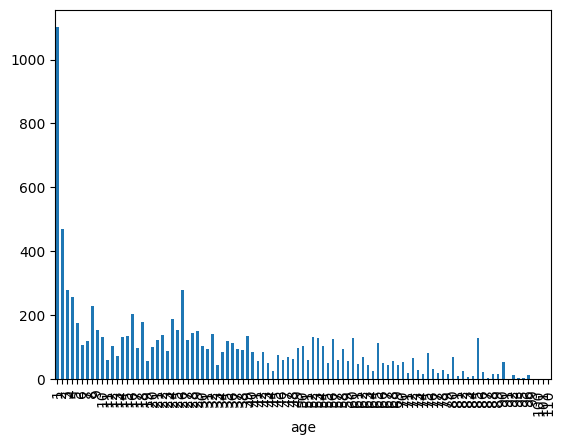

In [10]:
image_paths_csv.age.value_counts().sort_index().plot(kind='bar')

In [11]:
image_paths_csv=bin_ages(image_paths_csv)

In [12]:
image_paths_csv.head()

,path,age,age_bin,age_bin_label
0,../raw_data/face_age/018/4794.png,18,5,Young Adults (18–24)
1,../raw_data/face_age/018/8685.png,18,5,Young Adults (18–24)
2,../raw_data/face_age/018/6771.png,18,5,Young Adults (18–24)
3,../raw_data/face_age/018/3967.png,18,5,Young Adults (18–24)
4,../raw_data/face_age/018/5160.png,18,5,Young Adults (18–24)


In [13]:
image_paths_csv.path

0       ../raw_data/face_age/018/4794.png
1       ../raw_data/face_age/018/8685.png
2       ../raw_data/face_age/018/6771.png
3       ../raw_data/face_age/018/3967.png
4       ../raw_data/face_age/018/5160.png
                      ...                
9567    ../raw_data/face_age/040/2647.png
9568    ../raw_data/face_age/040/2248.png
9569    ../raw_data/face_age/040/3265.png
9570    ../raw_data/face_age/040/4480.png
9571     ../raw_data/face_age/040/549.png
Name: path, Length: 9572, dtype: object

In [14]:
image_paths_csv.to_csv("./processed_data/image_paths.csv", index=False)

In [15]:
image_paths_csv.age_bin.value_counts().sort_index()

age_bin
0     1572
1      712
2      459
3      453
4      641
5      875
6     1325
7      854
8      901
9      710
10     489
11     299
12     282
Name: count, dtype: int64

In [16]:
paths_train_df, paths_val_df, paths_test_df = split_data(image_paths_csv)